In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/data/CIA_Country_Facts.csv')

In [4]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [7]:
# this is the data of 223 countries across the different continents.
#lets see if any data is missing.
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [8]:
# here agriculture is missing for 15 countries. Lets see which countries are those.
df[df['Agriculture'].isnull()]['Country']

3            American Samoa
4                   Andorra
78                Gibraltar
80                Greenland
83                     Guam
134                 Mayotte
140              Montserrat
144                   Nauru
153      N. Mariana Islands
171            Saint Helena
174    St Pierre & Miquelon
177              San Marino
208       Turks & Caicos Is
221       Wallis and Futuna
223          Western Sahara
Name: Country, dtype: object

In [10]:
# lets fill the missing values with 0 in  the agriculture column as most of these are tiny islands.
df[df['Agriculture'].isnull()] = df[df['Agriculture'].isnull()].fillna(0)

In [11]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                               18
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       226 non-null    float64
 7   Infant mortality (per 1000 births)  226 non-null    float64
 8   GDP ($ per capita)                  227 non-null    float64
 9   Literacy (%)                        214 non-null    float64
 10  Phones (per 1000)                   225 non-null    float64
 11  Arable (%)                          226 non-n

In [13]:
# Now, the climate and the literacy are the most missing values. we can fill the missing climate values based on the mean climate of the region.
# to do this, we group the countries by the region and the get the mean climate value and replace the missing value with the mean.
df['Climate'] = df['Climate'].fillna(df.groupby('Region')['Climate'].transform('mean'))

In [14]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                                0
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

In [16]:
# same we do for the literacy as done with the climate .
df['Literacy (%)'] = df['Literacy (%)'].fillna(df.groupby('Region')['Literacy (%)'].transform('mean'))
# one can take the mean by grouping with the GDP or any other instead of Region.

In [17]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         1
Infant mortality (per 1000 births)    1
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     2
Arable (%)                            1
Crops (%)                             1
Other (%)                             1
Climate                               0
Birthrate                             1
Deathrate                             2
Agriculture                           0
Industry                              1
Service                               1
dtype: int64

In [18]:
# lets drop remaining all the missing values.
df = df.dropna()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             221 non-null    object 
 1   Region                              221 non-null    object 
 2   Population                          221 non-null    int64  
 3   Area (sq. mi.)                      221 non-null    int64  
 4   Pop. Density (per sq. mi.)          221 non-null    float64
 5   Coastline (coast/area ratio)        221 non-null    float64
 6   Net migration                       221 non-null    float64
 7   Infant mortality (per 1000 births)  221 non-null    float64
 8   GDP ($ per capita)                  221 non-null    float64
 9   Literacy (%)                        221 non-null    float64
 10  Phones (per 1000)                   221 non-null    float64
 11  Arable (%)                          221 non-n

In [20]:
# Lets visualize the data.

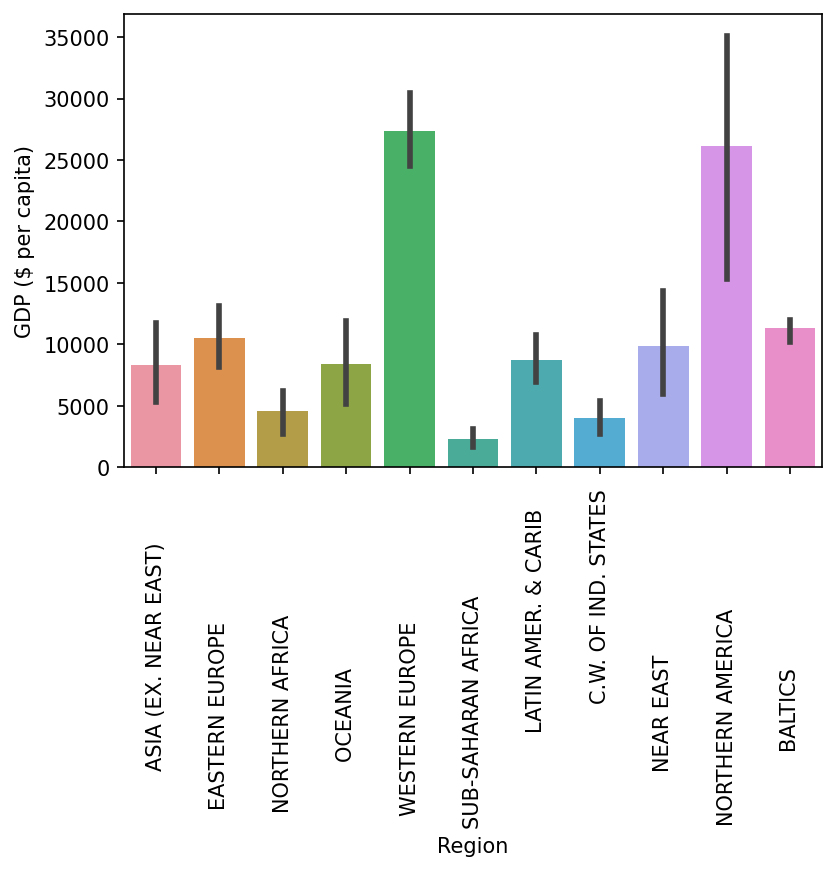

In [24]:
plt.figure(figsize=(6,4),dpi = 150)
sns.barplot(data = df,x = 'Region',y = 'GDP ($ per capita)')
# lets rotete the x axis label by 90 degrees
plt.xticks(rotation =90);

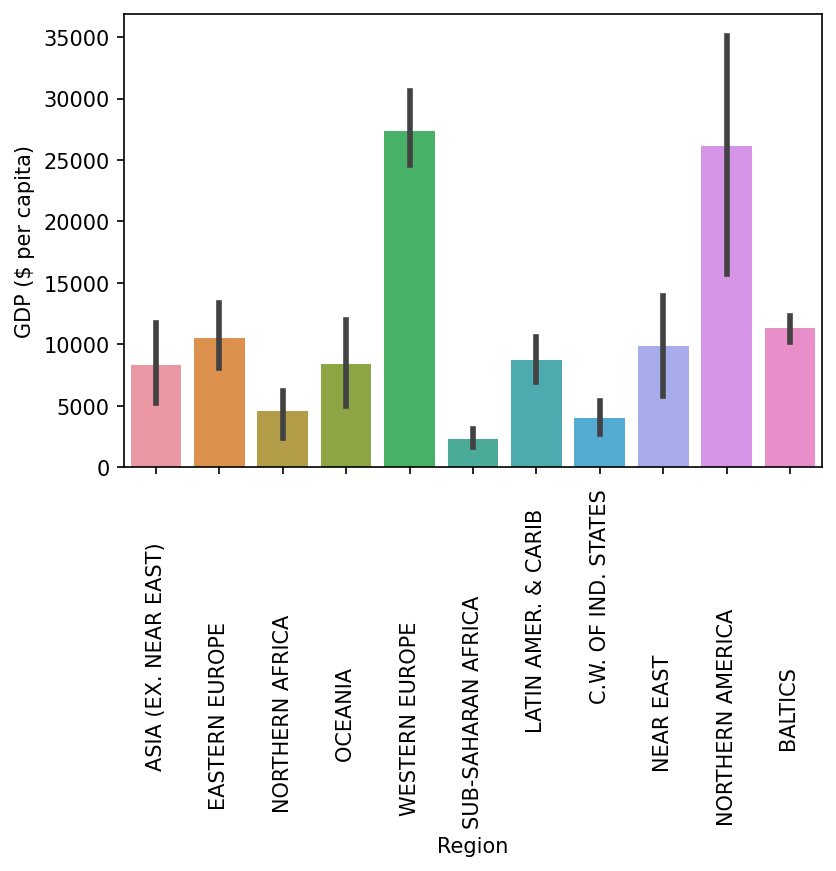

In [25]:
plt.figure(figsize=(6,4),dpi = 150)
sns.barplot(data = df,x = 'Region',y = 'GDP ($ per capita)',estimator= np.mean)
# lets rotete the x axis label by 90 degrees
plt.xticks(rotation =90);

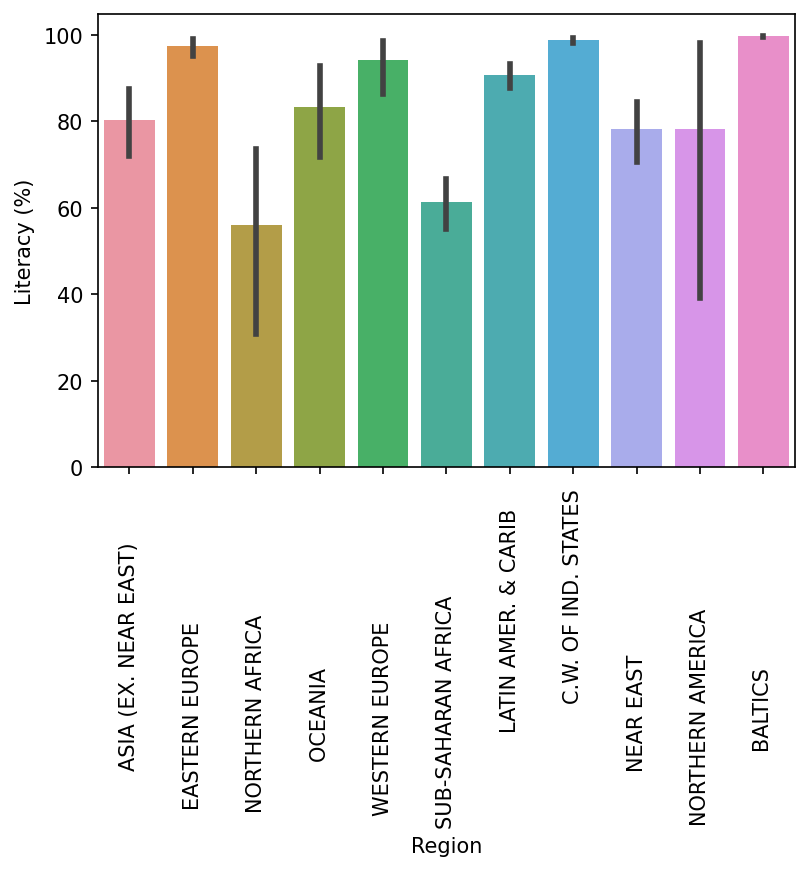

In [26]:
plt.figure(figsize=(6,4),dpi = 150)
sns.barplot(data = df,x = 'Region',y = 'Literacy (%)',estimator= np.mean)
# lets rotete the x axis label by 90 degrees
plt.xticks(rotation =90);

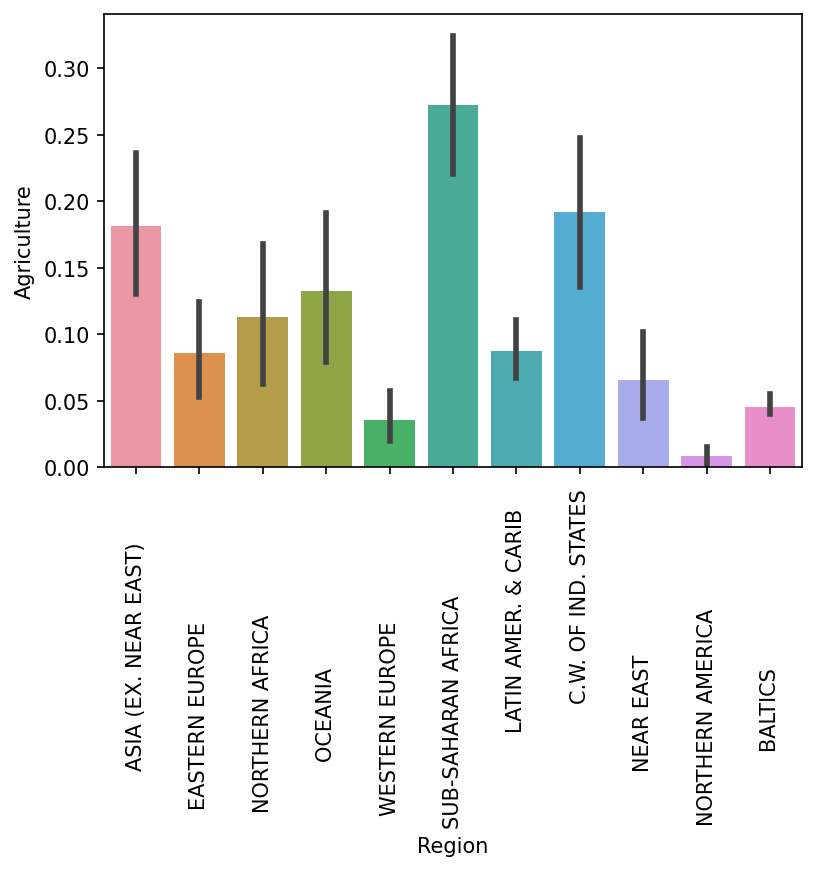

In [27]:
#lets see how the regions are dependent on agriculture
plt.figure(figsize=(6,4),dpi = 150)
sns.barplot(data = df,x = 'Region',y = 'Agriculture')
# lets rotete the x axis label by 90 degrees
plt.xticks(rotation =90);

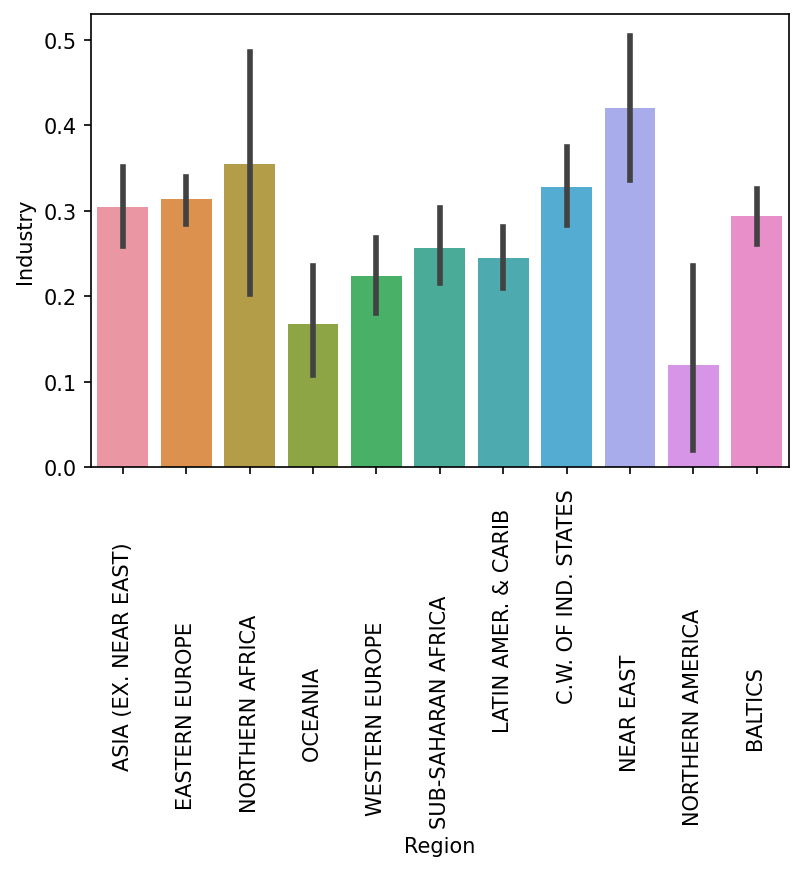

In [29]:
plt.figure(figsize=(6,4),dpi = 150)
sns.barplot(data = df,x = 'Region',y = 'Industry')
# lets rotete the x axis label by 90 degrees
plt.xticks(rotation =90);

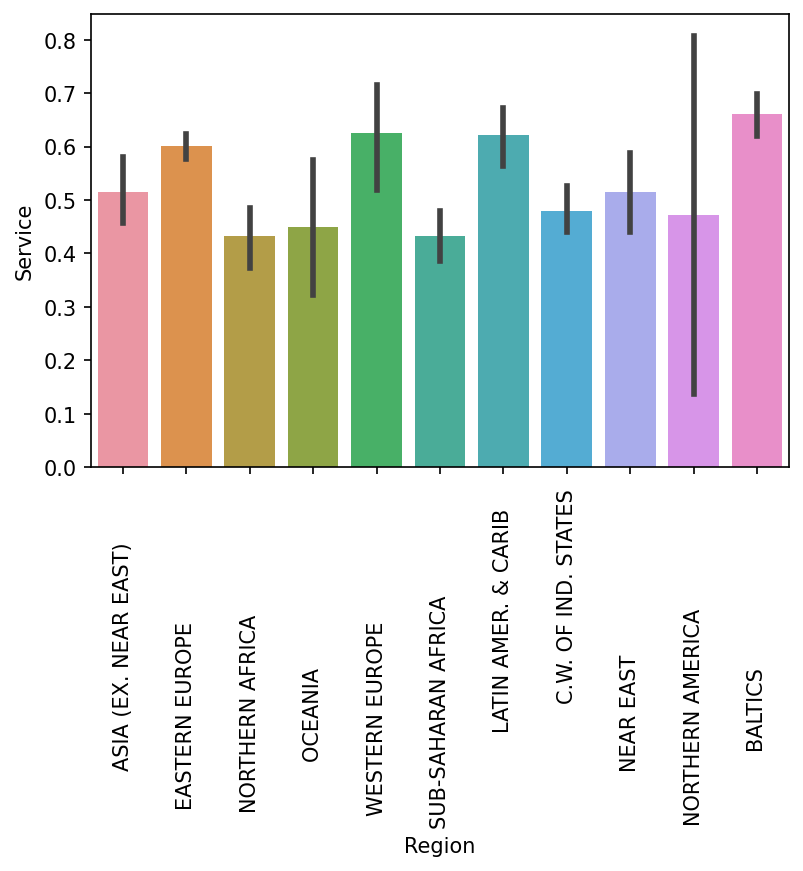

In [30]:
plt.figure(figsize=(6,4),dpi = 150)
sns.barplot(data = df,x = 'Region',y = 'Service')
# lets rotete the x axis label by 90 degrees
plt.xticks(rotation =90);

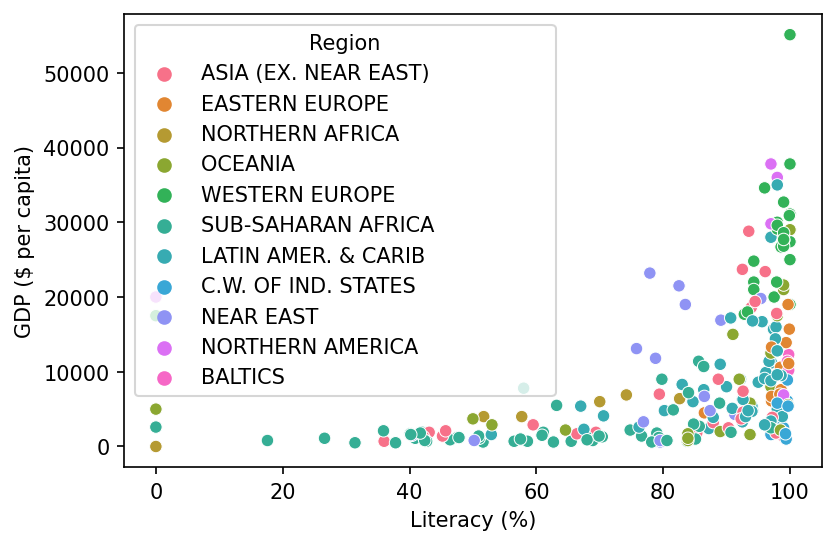

In [33]:
plt.figure(figsize=(6,4),dpi = 150)
sns.scatterplot(data = df,y = 'GDP ($ per capita)',x = 'Literacy (%)',hue='Region')



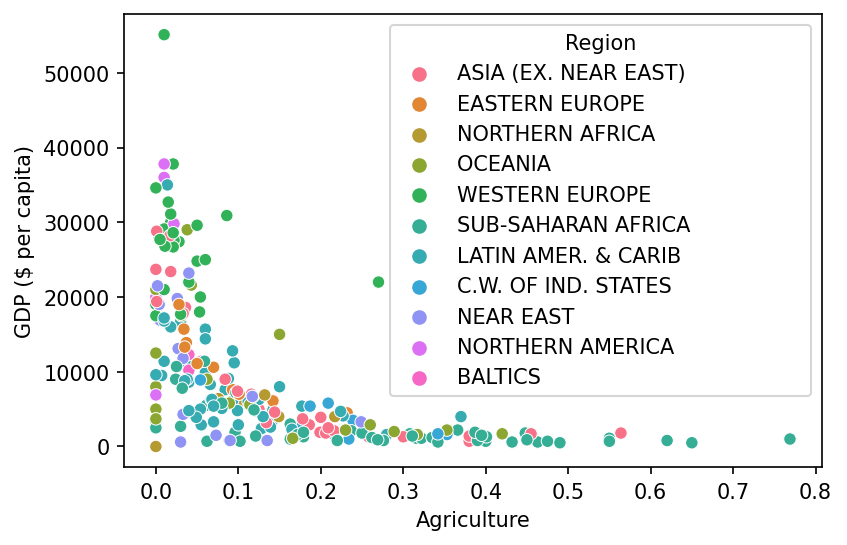

In [34]:
plt.figure(figsize=(6,4),dpi = 150)
sns.scatterplot(data = df,y = 'GDP ($ per capita)',x = 'Agriculture',hue='Region')


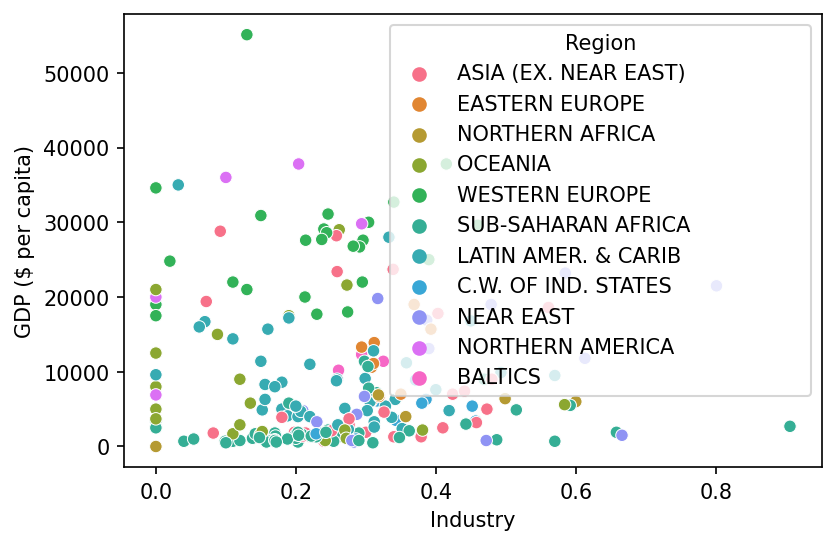

In [35]:
plt.figure(figsize=(6,4),dpi = 150)
sns.scatterplot(data = df,y = 'GDP ($ per capita)',x = 'Industry',hue='Region')


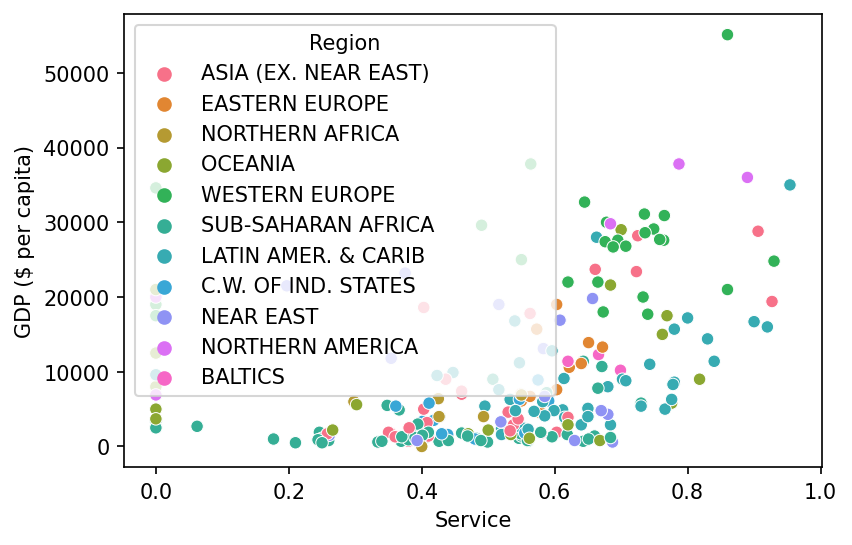

In [36]:
plt.figure(figsize=(6,4),dpi = 150)
sns.scatterplot(data = df,y = 'GDP ($ per capita)',x = 'Service',hue='Region')

In [37]:
# one can see that the regions which are most dependent on services have high gdp per capita


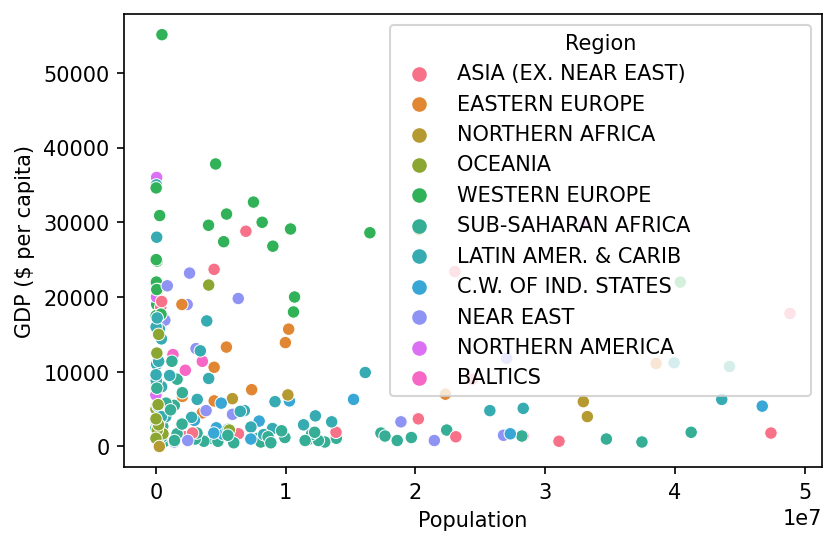

In [41]:
plt.figure(figsize=(6,4),dpi = 150)
sns.scatterplot(data = df[df['Population']< 50000000],y = 'GDP ($ per capita)',x = 'Population',hue='Region')

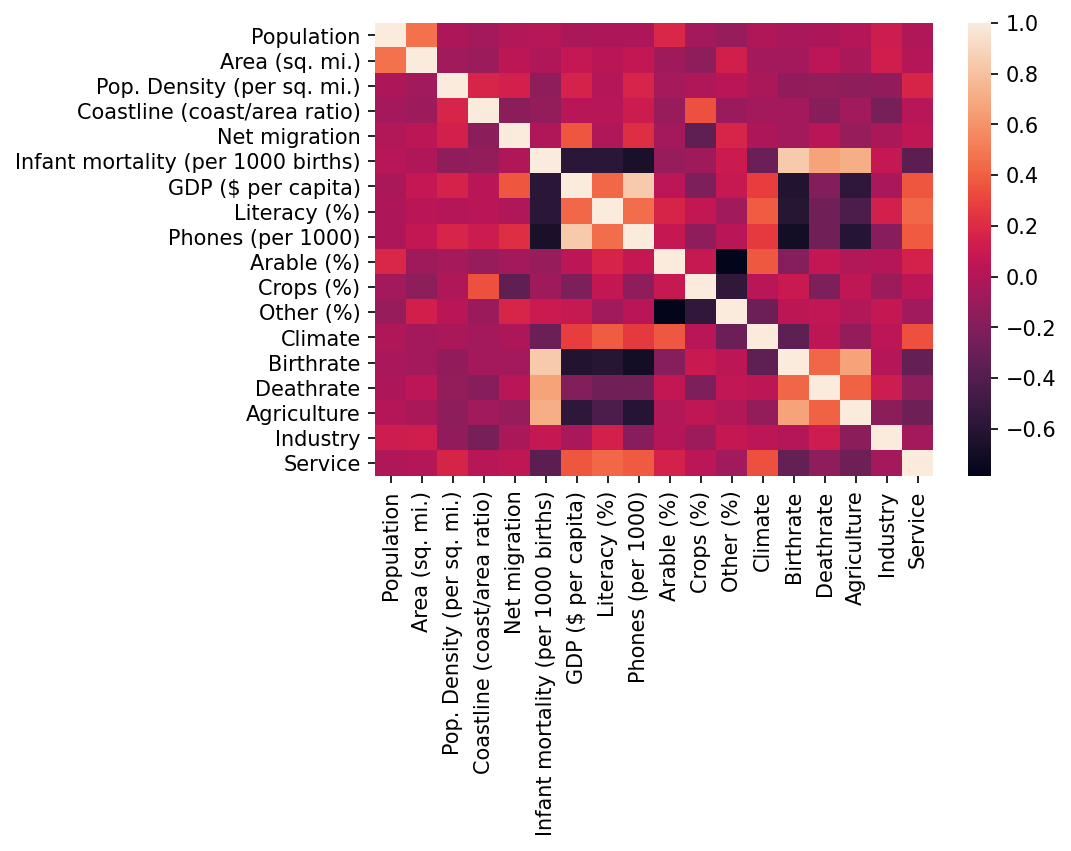

In [45]:
plt.figure(figsize=(6,4),dpi = 150)
sns.heatmap(df.corr(),)

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = df.drop('Country',axis=1)
y = df['Country']
sc= StandardScaler()


In [47]:
# the region column is in strings. so we should get dummies.
X = pd.get_dummies(X)

In [48]:
X

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Region_ASIA (EX. NEAR EAST),Region_BALTICS,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.000000,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,1,0,0,0,0,0,0,0,0,0,0
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.500000,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,0,0,0,1,0,0,0,0,0,0,0
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.000000,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298,0,0,0,0,0,0,1,0,0,0,0
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.000000,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.000,0.000,0.000,0,0,0,0,0,0,0,0,1,0,0
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.000000,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.000,0.000,0.000,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,2460492,5860,419.9,0.00,2.98,19.62,800.0,79.521429,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630,0,0,0,0,0,1,0,0,0,0,0
223,273008,266000,1.0,0.42,0.00,0.00,0.0,0.000000,0.0,0.02,0.00,99.98,1.0,0.00,0.00,0.000,0.000,0.400,0,0,0,0,0,0,1,0,0,0,0
224,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.200000,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393,0,0,0,0,0,1,0,0,0,0,0
225,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.600000,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489,0,0,0,0,0,0,0,0,0,1,0


In [49]:
scaled_X = sc.fit_transform(X)

In [52]:
from sklearn.cluster import KMeans


In [60]:
#now, we dont know the no of clusters we have to take. so we take a list of number of clusters and perform the model with each cluster
distance = []
for k in range (2,30):
  model = KMeans(n_clusters=k)
  model.fit(scaled_X)
  distance.append(model.inertia_)


Text(0, 0.5, 'sum_of_squared_distance_[distance]')

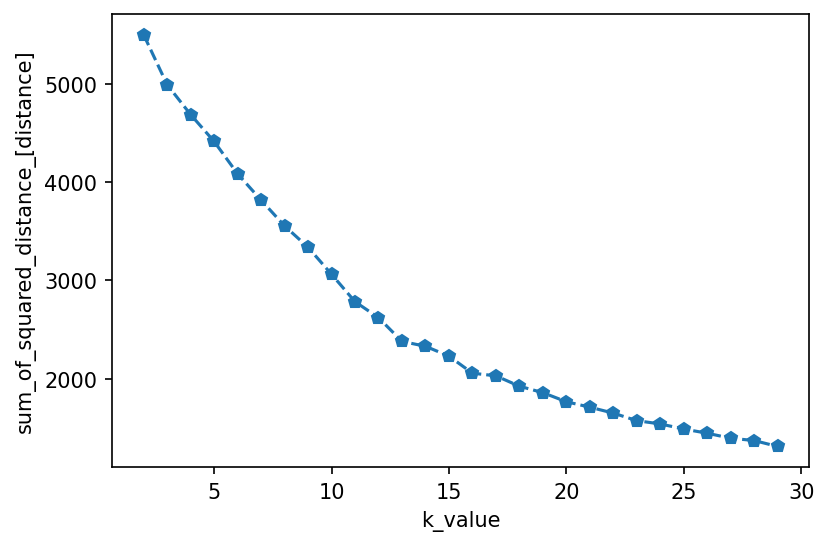

In [61]:
plt.figure(figsize=(6,4),dpi = 150)
plt.plot(range(2,30),distance,'p--')
plt.xlabel("k_value")
plt.ylabel("sum_of_squared_distance_[distance]")

In [62]:
# now, we plot the difference of ssd between k and k+1 cluster


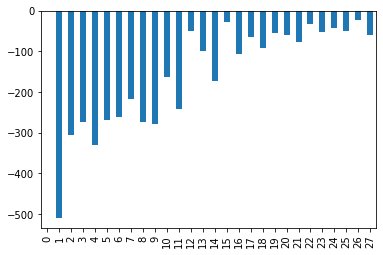

In [64]:
pd.Series(distance).diff().plot(kind= 'bar')

In [65]:
# taking no of clusters equal to 3
model = KMeans(n_clusters=3)
model.fit(scaled_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [66]:
model.labels_

array([1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 1,
       2, 1, 0, 2, 1, 0, 2, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 2, 0, 2, 2, 1, 0, 0, 0, 0, 0, 1, 1, 2, 1, 2, 0, 2,
       2, 0, 0, 1, 1, 0, 0, 2, 1, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 2,
       2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 1, 0, 0, 2, 0, 0, 1,
       2, 0, 1, 1, 0, 2, 2, 2, 2, 2, 1, 1, 0, 0, 1, 2, 0, 0, 1, 2, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 0, 0, 2, 0, 1, 1, 0, 2, 0, 1, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1,
       0, 1, 2, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 2, 2, 0, 2, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1], dtype=int32)